**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/parsing-dates).**

---


In this exercise, you'll apply what you learned in the **Parsing dates** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex3 import *
print("Setup Complete")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Setup Complete


# Get our environment set up

The first thing we'll need to do is load in the libraries and dataset we'll be using. We'll be working with a dataset containing information on earthquakes that occured between 1965 and 2016.

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

# 1) Check the data type of our date column

You'll be working with the "Date" column from the `earthquakes` dataframe.  Investigate this column now: does it look like it contains dates?  What is the dtype of the column?

In [4]:
# TODO: Your code here!
earthquakes['Date'].dtype

# checking by info function
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Once you have answered the question above, run the code cell below to get credit for your work.

In [24]:
# Check your answer (Run this code cell to receive credit!)
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The "Date" column in the `earthquakes` DataFrame does have dates.  The dtype is "object".

In [26]:
# Line below will give you a hint
q1.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `earthquakes['Date'].head()` to check that the column contains dates and verify that it has dtype "object".  You can also use `earthquakes['Date'].dtype` to verify the dtype.

# 2) Convert our date columns to datetime

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year".  However, the entry at index 3378 follows a completely different pattern.  Run the code cell below to see this.

In [44]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,parsed_date,date_parsed
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23 02:58:41+00:00,1975-02-23 02:58:41+00:00
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed,1975-02-23 00:00:00,1975-02-23 00:00:00
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed,1975-02-23 00:00:00,1975-02-23 00:00:00
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed,1975-02-25 00:00:00,1975-02-25 00:00:00
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed,1975-02-26 00:00:00,1975-02-26 00:00:00


In [45]:
# adding the parsed date column into Dataframe

earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

In [46]:
# checking the date_parsed column
earthquakes['date_parsed'].head(50)

0    1965-01-02
1    1965-01-04
2    1965-01-05
3    1965-01-08
4    1965-01-09
5    1965-01-10
6    1965-01-12
7    1965-01-15
8    1965-01-16
9    1965-01-17
10   1965-01-17
11   1965-01-24
12   1965-01-29
13   1965-02-01
14   1965-02-02
15   1965-02-04
16   1965-02-04
17   1965-02-04
18   1965-02-04
19   1965-02-04
20   1965-02-04
21   1965-02-04
22   1965-02-04
23   1965-02-04
24   1965-02-04
25   1965-02-04
26   1965-02-04
27   1965-02-04
28   1965-02-04
29   1965-02-04
30   1965-02-04
31   1965-02-04
32   1965-02-04
33   1965-02-04
34   1965-02-05
35   1965-02-05
36   1965-02-05
37   1965-02-05
38   1965-02-05
39   1965-02-06
40   1965-02-06
41   1965-02-06
42   1965-02-06
43   1965-02-06
44   1965-02-06
45   1965-02-06
46   1965-02-07
47   1965-02-07
48   1965-02-07
49   1965-02-08
Name: date_parsed, dtype: datetime64[ns]

This does appear to be an issue with data entry: ideally, all entries in the column have the same format.  We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.

In [47]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23412
Name: Date, dtype: int64

Looks like there are two more rows that has a date in a different format.  Run the code cell below to obtain the indices corresponding to those rows and print the data.

In [48]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: []


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,parsed_date,date_parsed


Given all of this information, it's your turn to create a new column "date_parsed" in the `earthquakes` dataset that has correctly parsed dates in it.  

**Note**: When completing this problem, you are allowed to (but are not required to) amend the entries in the "Date" and "Time" columns.  Do not remove any rows from the dataset.

In [49]:
# TODO: Your code here

# Check your answer
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [54]:
# Lines below will give you a hint or solution code
#q2.hint()
#q2.solution()

# 3) Select the day of the month

Create a Pandas Series `day_of_month_earthquakes` containing the day of the month from the "date_parsed" column.

In [62]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
day_of_month_earthquakes

# Check your answer
#q3.check()

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

In [64]:
# Lines below will give you a hint or solution code
#q3.hint()
#q3.solution()

# 4) Plot the day of the month to check the date parsing

Plot the days of the month from your earthquake dataset.

/tmp/ipykernel_32/4270380121.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_earthquakes, hist=False, bins=31)


<Axes: xlabel='date_parsed', ylabel='Density'>

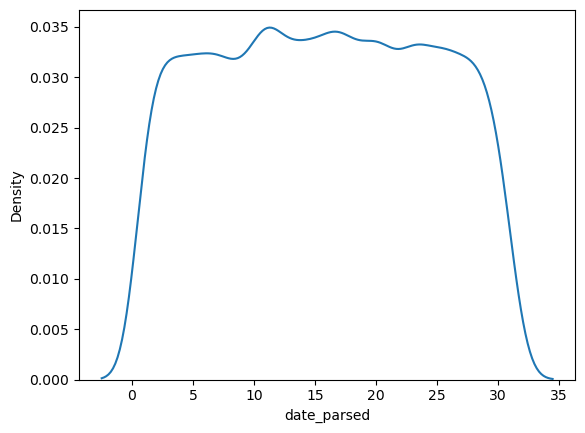

In [78]:
# TODO: Your code here!
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
day_of_month_earthquakes

# plotting the graph
sns.distplot(day_of_month_earthquakes, hist=False, bins=31)

# bins=31: This parameter controls the number of bins used in the histogram. 
#In this case, it seems to be set to 31, which corresponds to the number of days in a month. 
#Each bin represents a range of values, and the histogram will show the frequency of values falling into each bin.

Does the graph make sense to you?

In [79]:
# Check your answer (Run this code cell to receive credit!)
q4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The graph should make sense: it shows a relatively even distribution in days of the month,which is what we would expect.

In [80]:
# Line below will give you a hint
q4.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> 
Remove the missing values, and then use `sns.distplot()` as follows:

```python
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)
```



# (Optional) Bonus Challenge

For an extra challenge, you'll work with a [Smithsonian dataset](https://www.kaggle.com/smithsonian/volcanic-eruptions) that documents Earth's volcanoes and their eruptive history over the past 10,000 years 

Run the next code cell to load the data.

In [ ]:
volcanos = pd.read_csv("../input/volcanic-eruptions/database.csv")

Try parsing the column "Last Known Eruption" from the `volcanos` dataframe. This column contains a mixture of text ("Unknown") and years both before the common era (BCE, also known as BC) and in the common era (CE, also known as AD).

In [ ]:
volcanos['Last Known Eruption'].sample(5)

# (Optional) More practice

If you're interested in graphing time series, [check out this tutorial](https://www.kaggle.com/residentmario/time-series-plotting-optional).

You can also look into passing columns that you know have dates in them  the `parse_dates` argument in `read_csv`. (The documention [is here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).) Do note that this method can be very slow, but depending on your needs it may sometimes be handy to use.

# Keep going

In the next lesson, learn how to [**work with character encodings**](https://www.kaggle.com/alexisbcook/character-encodings).

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-cleaning/discussion) to chat with other learners.*